In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier #pour la classification on va utiliser RandomForestClassifier
from sklearn.model_selection import train_test_split #C'est la methode qui va nous permettre de diviser notre ensemble de données en un ensemble d'entrainement et en un ensemble de test. Cela nous permet de s'assurer que le modéle ne soit pas surajusté(overfiting) aux données d'entrainement.
from sklearn.metrics import accuracy_score, classification_report # accuracy pour calculer l'exactitude du modéle.

In [2]:
df=pd.read_csv("Loan_default.csv")

In [10]:
df.head() 

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1,3,2,1,1,0,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,3,0,0,0,0,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,0,2,1,1,2,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0,3,0,0,0,1,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1,0,2,0,1,2,0,0


In [11]:
# df.describe()

In [12]:
df.isnull()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
255343,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
255344,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
255345,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
#df.drop_duplicates()

In [14]:
#data.info()

In [15]:
df= df.replace(["Married"],0)
df= df.replace(["Divorced"],2)
df= df.replace(["Single"],1)
df= df.replace(["Yes"],1)
df= df.replace(["No"],0)
df= df.replace(["Unemployed"],0)
df= df.replace(["Self-employed"],2)
df= df.replace(["Part-time"],1)
df= df.replace(["Full-time"],3)
df= df.replace(["Other"],0)
df= df.replace(["Auto"],2)
df= df.replace(["Business"],1)
df= df.replace(["Home"],3)
df= df.replace(["Education"],4)
df= df.replace(["High School"],0)
df= df.replace(["Master's"],2)
df= df.replace(["Bachelor's"],1)
df= df.replace(["PhD"],3)

In [16]:
df.head() 

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1,3,2,1,1,0,1,0
1,69,50432,124440,458,15,1,4.81,60,0.68,2,3,0,0,0,0,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,0,2,1,1,2,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0,3,0,0,0,1,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1,0,2,0,1,2,0,0


In [23]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
#df=df.drop(columns=['LoanID'])
df_scaled = scaler.fit_transform(df.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['Age','Income','LoanAmount','CreditScore','MonthsEmployed'
,'NumCreditLines','InterestRate','LoanTerm','DTIRatio','Education',
'EmploymentType','MaritalStatus','HasMortgage','HasDependents',
'LoanPurpose','HasCoSigner','Default'])

In [24]:
numerical_data = df.select_dtypes(include = np.number)
correlation = numerical_data.corr()
correlation

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,-0.001127,0.000263,-0.004689,-0.000848,0.000213,-0.000543,0.000035,0.000710,-0.002978,-0.002918,-0.167783
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.002303,-0.000998,0.000205,0.000681,0.005479,0.000393,-0.000945,-0.001570,-0.003629,-0.003524,-0.099119
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,-0.002291,0.002538,0.001122,0.002540,-0.002717,0.003225,-0.000801,0.000139,0.001029,-0.001848,0.086659
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.000436,0.001130,-0.001039,-0.000800,-0.002680,0.001516,0.001728,-0.003018,-0.001232,-0.002755,-0.034166
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,0.000096,-0.001166,0.001765,-0.001147,-0.000831,-0.000866,0.000210,0.001450,-0.000800,0.001045,-0.097374
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000297,-0.000226,-0.000586,0.001531,0.000004,-0.000297,-0.001744,-0.001895,0.001681,0.002105,0.028330
InterestRate,-0.001127,-0.002303,-0.002291,0.000436,0.000096,-0.000297,1.000000,0.000892,0.000575,0.003417,-0.001030,0.003814,-0.000424,-0.000243,0.002505,-0.003991,0.131273
LoanTerm,0.000263,-0.000998,0.002538,0.001130,-0.001166,-0.000226,0.000892,1.000000,0.002273,-0.001421,-0.002043,0.000602,0.001775,0.002417,-0.000422,-0.001166,0.000545
DTIRatio,-0.004689,0.000205,0.001122,-0.001039,0.001765,-0.000586,0.000575,0.002273,1.000000,0.001947,0.000101,-0.001924,0.000231,0.001492,0.002788,0.000373,0.019236
Education,-0.000848,0.000681,0.002540,-0.000800,-0.001147,0.001531,0.003417,-0.001421,0.001947,1.000000,-0.000618,0.000620,0.001965,0.000056,0.000733,0.001692,-0.028282


In [25]:
selected_columns = df[['Income', 'Age', 'LoanAmount', 'CreditScore', 'Default']]
column_correlation = selected_columns.corr()

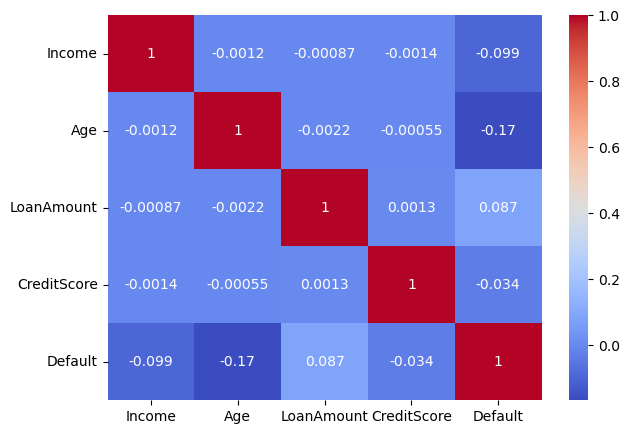

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(column_correlation, annot=True, cmap='coolwarm')
plt.show()

In [27]:
statut_matrimonial = df['MaritalStatus'].value_counts()
print(statut_matrimonial)

MaritalStatus
0    85302
2    85033
1    85012
Name: count, dtype: int64


In [28]:
y = df['Default']
X = df.drop('Default', axis=1)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [31]:
clf.fit(X_train, y_train) #Entrainement du modèle

RandomForestClassifier(random_state=42)

In [33]:
y_pred = clf.predict(X_test) #Pour effectuer des prédictions

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude :", accuracy)
print(classification_report(y_test, y_pred))

Exactitude : 0.8856210430128582
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67681
           1       0.63      0.05      0.08      8924

    accuracy                           0.89     76605
   macro avg       0.76      0.52      0.51     76605
weighted avg       0.86      0.89      0.84     76605



In [35]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.6261682242990654
Recall: 0.04504706409681757
F1 Score: 0.08404766882709597
